# Rafiu Ali
rafiuali2002@gmail.com

## College Exam Results (SAT)

In [1]:
#import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
file_path = r"D:\Datascience jpy\SAT__College_Board__2010_School_Level_Results_20240506.csv"
df = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the dataset
print(df.head())

      DBN                                     School Name  \
0  01M292  Henry Street School for International Studies    
1  01M448            University Neighborhood High School    
2  01M450                East Side Community High School    
3  01M458                   SATELLITE ACADEMY FORSYTH ST    
4  01M509                               CMSP HIGH SCHOOL    

   Number of Test Takers  Critical Reading Mean  Mathematics Mean  \
0                   31.0                  391.0             425.0   
1                   60.0                  394.0             419.0   
2                   69.0                  418.0             431.0   
3                   26.0                  385.0             370.0   
4                    NaN                    NaN               NaN   

   Writing Mean  
0         385.0  
1         387.0  
2         402.0  
3         378.0  
4           NaN  


In [4]:
# Get a summary of the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DBN                    460 non-null    object 
 1   School Name            460 non-null    object 
 2   Number of Test Takers  386 non-null    float64
 3   Critical Reading Mean  386 non-null    float64
 4   Mathematics Mean       386 non-null    float64
 5   Writing Mean           386 non-null    float64
dtypes: float64(4), object(2)
memory usage: 21.7+ KB
None
       Number of Test Takers  Critical Reading Mean  Mathematics Mean  \
count             386.000000             386.000000        386.000000   
mean              103.658031             404.248705        412.935233   
std               145.264496              56.815631         64.990976   
min                 7.000000             291.000000        281.000000   
25%                35.000000             370.000000      

In [5]:
# Check for missing values
print(df.isnull().sum())

DBN                       0
School Name               0
Number of Test Takers    74
Critical Reading Mean    74
Mathematics Mean         74
Writing Mean             74
dtype: int64


In [6]:
# Drop rows with missing values
df = df.dropna()

In [7]:
# Convert data types if necessary
df['Number of Test Takers'] = df['Number of Test Takers'].astype(int)

Text(0.5, 1.0, 'Critical Reading Mean Distribution')

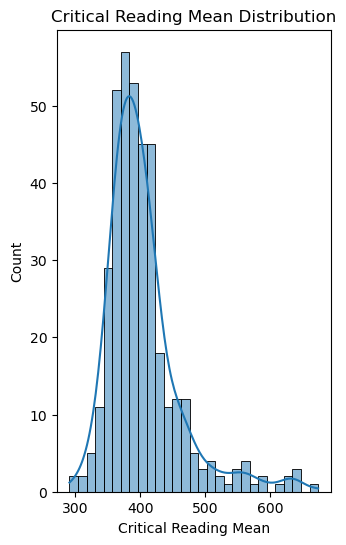

In [8]:
# Distribution of SAT scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['Critical Reading Mean'], kde=True)
plt.title('Critical Reading Mean Distribution')

Text(0.5, 1.0, 'Mathematics Mean Distribution')

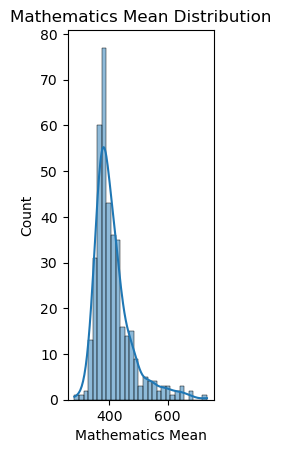

In [9]:
plt.subplot(1, 3, 2)
sns.histplot(df['Mathematics Mean'], kde=True)
plt.title('Mathematics Mean Distribution')

Text(0.5, 1.0, 'Writing Mean Distribution')

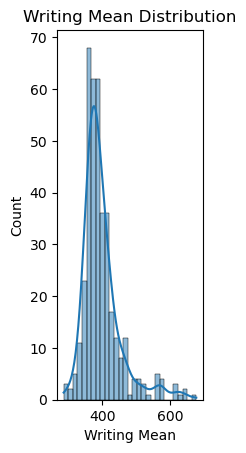

In [10]:
plt.subplot(1, 3, 3)
sns.histplot(df['Writing Mean'], kde=True)
plt.title('Writing Mean Distribution')

In [11]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Test Takers vs Critical Reading Mean')

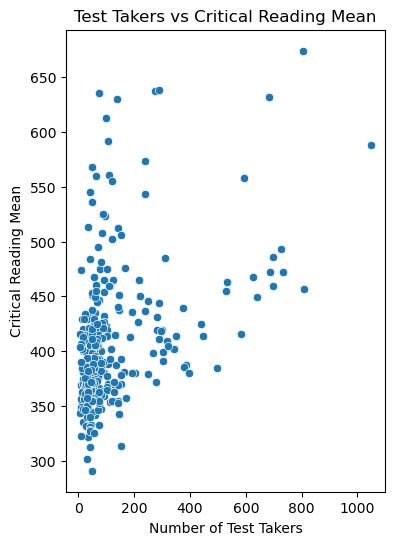

In [12]:
# Relationship between number of test takers and mean scores
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='Number of Test Takers', y='Critical Reading Mean')
plt.title('Test Takers vs Critical Reading Mean')

Text(0.5, 1.0, 'Test Takers vs Mathematics Mean')

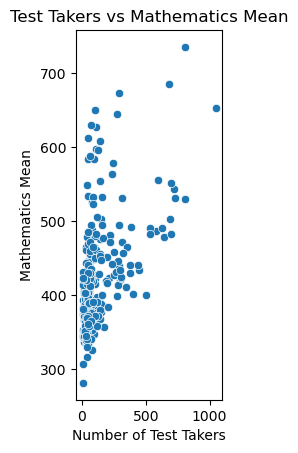

In [13]:
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='Number of Test Takers', y='Mathematics Mean')
plt.title('Test Takers vs Mathematics Mean')

Text(0.5, 1.0, 'Test Takers vs Writing Mean')

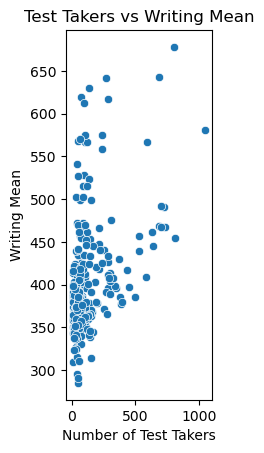

In [14]:
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Number of Test Takers', y='Writing Mean')
plt.title('Test Takers vs Writing Mean')

In [15]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [16]:
# Prepare the data
X = df[['Critical Reading Mean', 'Mathematics Mean']]
y = df['Writing Mean']

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Make predictions
y_pred = model.predict(X_test)

In [20]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 106.56458188853911
R-squared: 0.9674296625568007


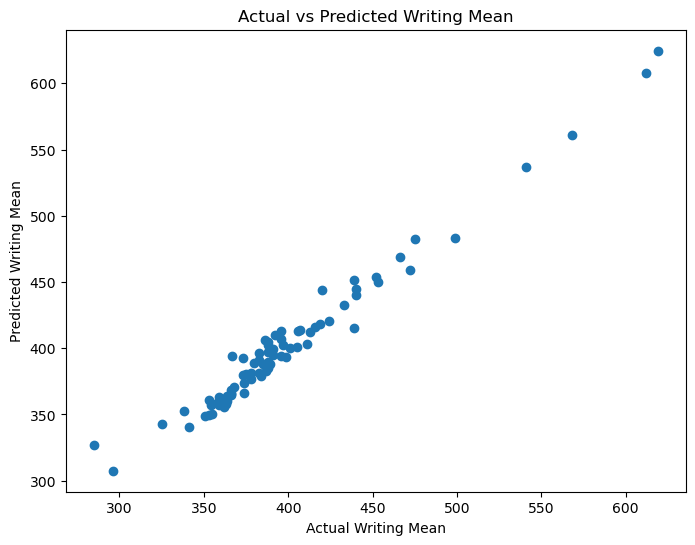

In [21]:
# Plot the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Writing Mean')
plt.ylabel('Predicted Writing Mean')
plt.title('Actual vs Predicted Writing Mean')
plt.show()

# Results:
The linear regression model demonstrated excellent performance, with a high R-squared value (0.967)
indicating that the model explains a significant portion of the variance in writing scores. 
The low MSE (106.56) further confirms the accuracy of the predictions. 
The scatter plot of actual vs predicted writing scores showed that most points are close to the 45-degree line
validating the model's predictive power.